# Objective
The aim of this project is to develop a regression model capable of accurately predicting solar power generation based on various environmental and meteorological features. The ultimate goal is to capture the relationship between solar energy output and influencing weather conditions, enabling better forecasting and energy planning for solar power systems.

###**Column Details:**
- **distance_to_solar_noon**: in radians.

- **temperature**: daily average temperature, in degrees Celsius.

- **wind_direction**: daily average wind direction, in degrees (0–360).

- **wind_speed**: daily average wind speed, in meters per second.

- **sky_cover**: on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

- **visibility**: in kilometers.

- **humidity**: in percentage.

- **average_wind_speed**: average wind speed during the 3 hours the measure was taken, in meters per second.

- **average_pressure**: average barometric pressure during the 3 hours the measure was taken, in inches of mercury.

- **power_generated (Target)**: in Joules for each 3-hour period.



In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/solarpowergeneration.csv")
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [3]:
df.shape

(2920, 10)

In [4]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


* We have around 10 columns and every columns appears to be in their respected types.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance-to-solar-noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
temperature,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
wind-direction,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
wind-speed,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
average-wind-speed-(period),2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
average-pressure-(period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


In [7]:
df['power-generated'].describe()

,power-generated
count,2920.000000
mean,6979.846233
std,10312.336413
min,0.000000
25%,0.000000
50%,404.000000
75%,12723.500000
max,36580.000000


In [8]:
#Let's check for any null values
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [9]:
# filling the null value with the column's mean value
mean_val = round(df['average-pressure-(period)'].mean(), 2)
df['average-wind-speed-(period)'].fillna(mean_val, inplace=True)

In [10]:
print(df.isnull().sum().sum())

0


In [11]:
# Let's check for any duplicated rows
print(df.duplicated().any())

False


No Duplicate rows we can move on to next step.

#EDA

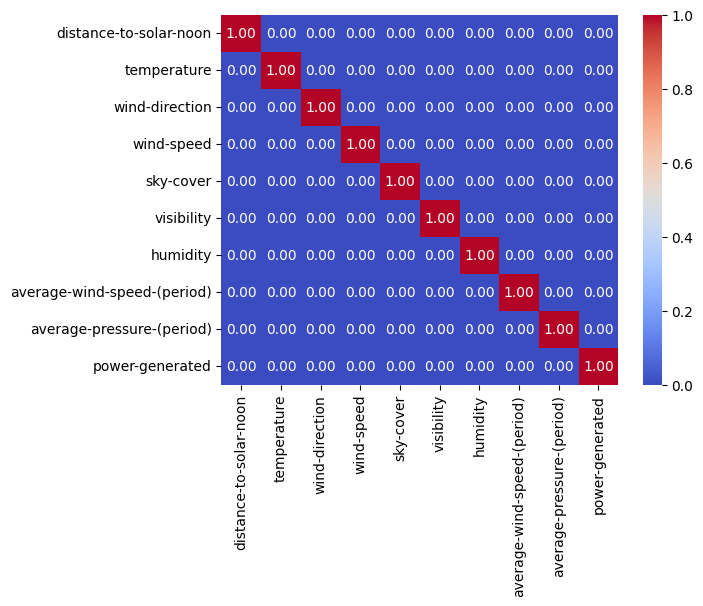

In [12]:
# Let's find correlation of all the columns

sns.heatmap(df.corr()>0.8, annot=True, cbar=True, cmap='coolwarm', fmt='.2f')
plt.show()

* We can see none of the columns seems to be highly correlated.
* It's a good thing so we can retain all the columns.

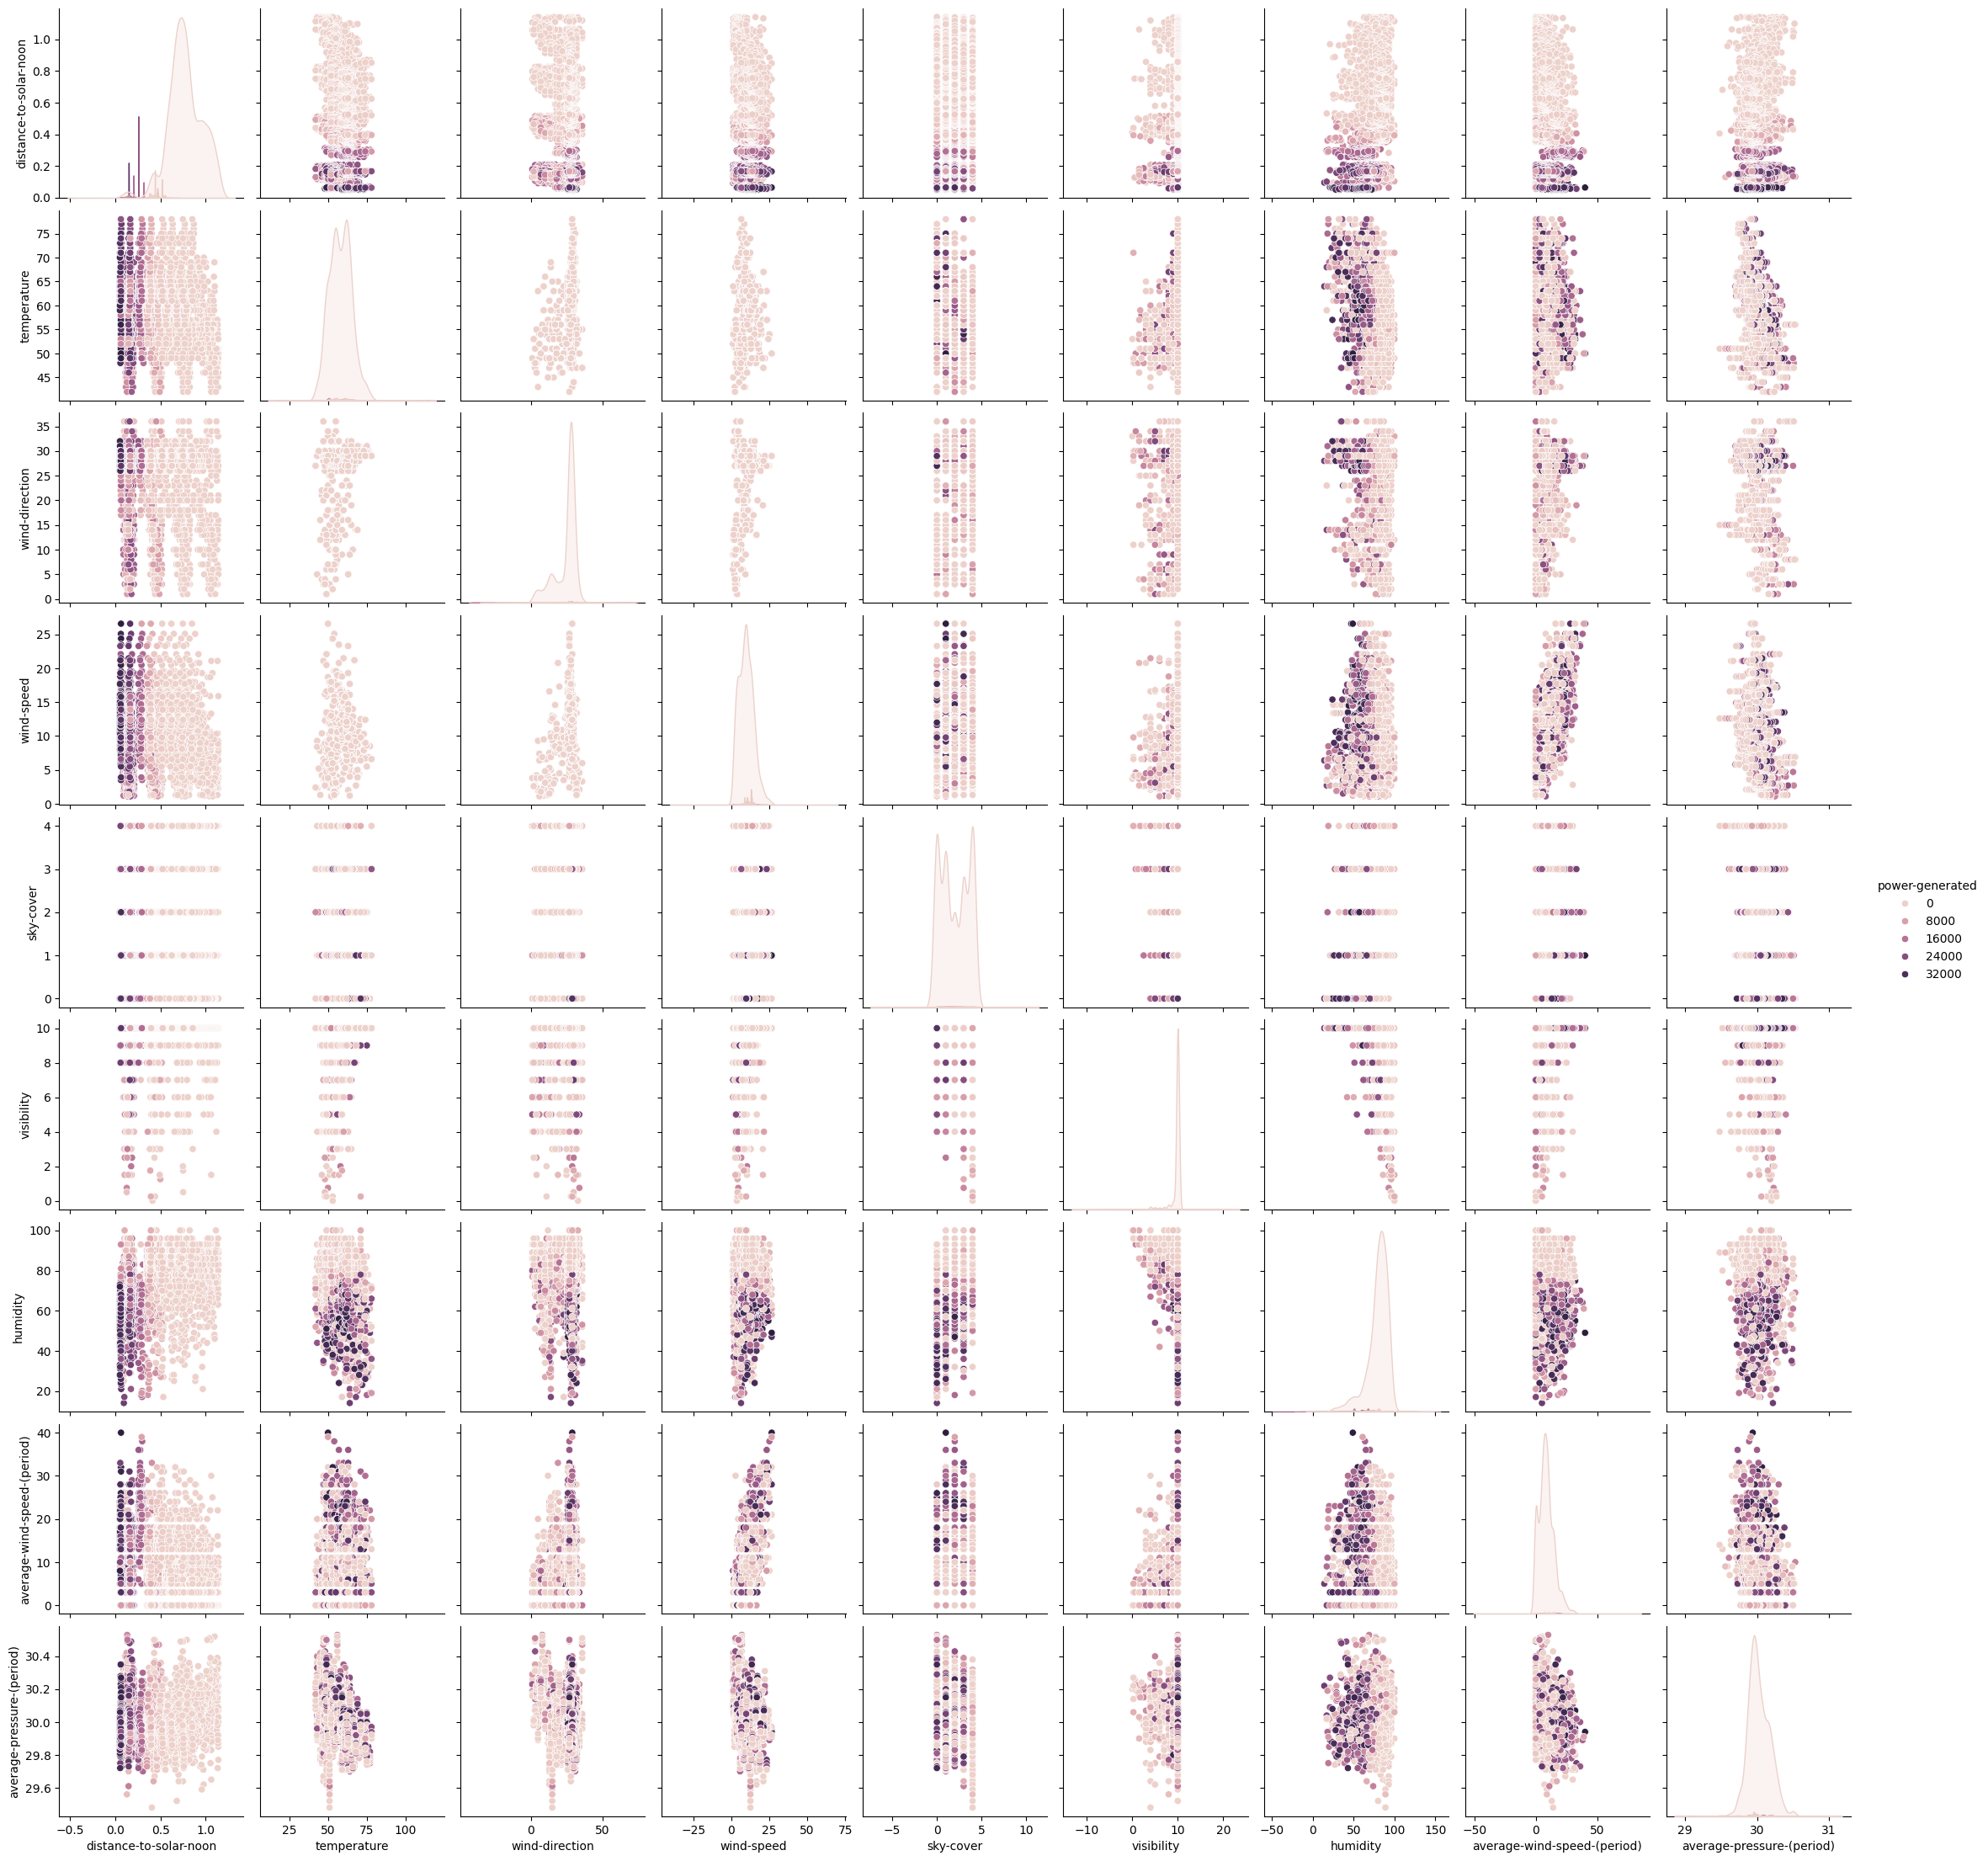

In [13]:
# Let's create and check pairplot for of the dataset for any possible hidden patters
sns.pairplot(df, hue='power-generated')
plt.show()

The above pairplot clearly shows there is possible relation between all the features and the target variable.

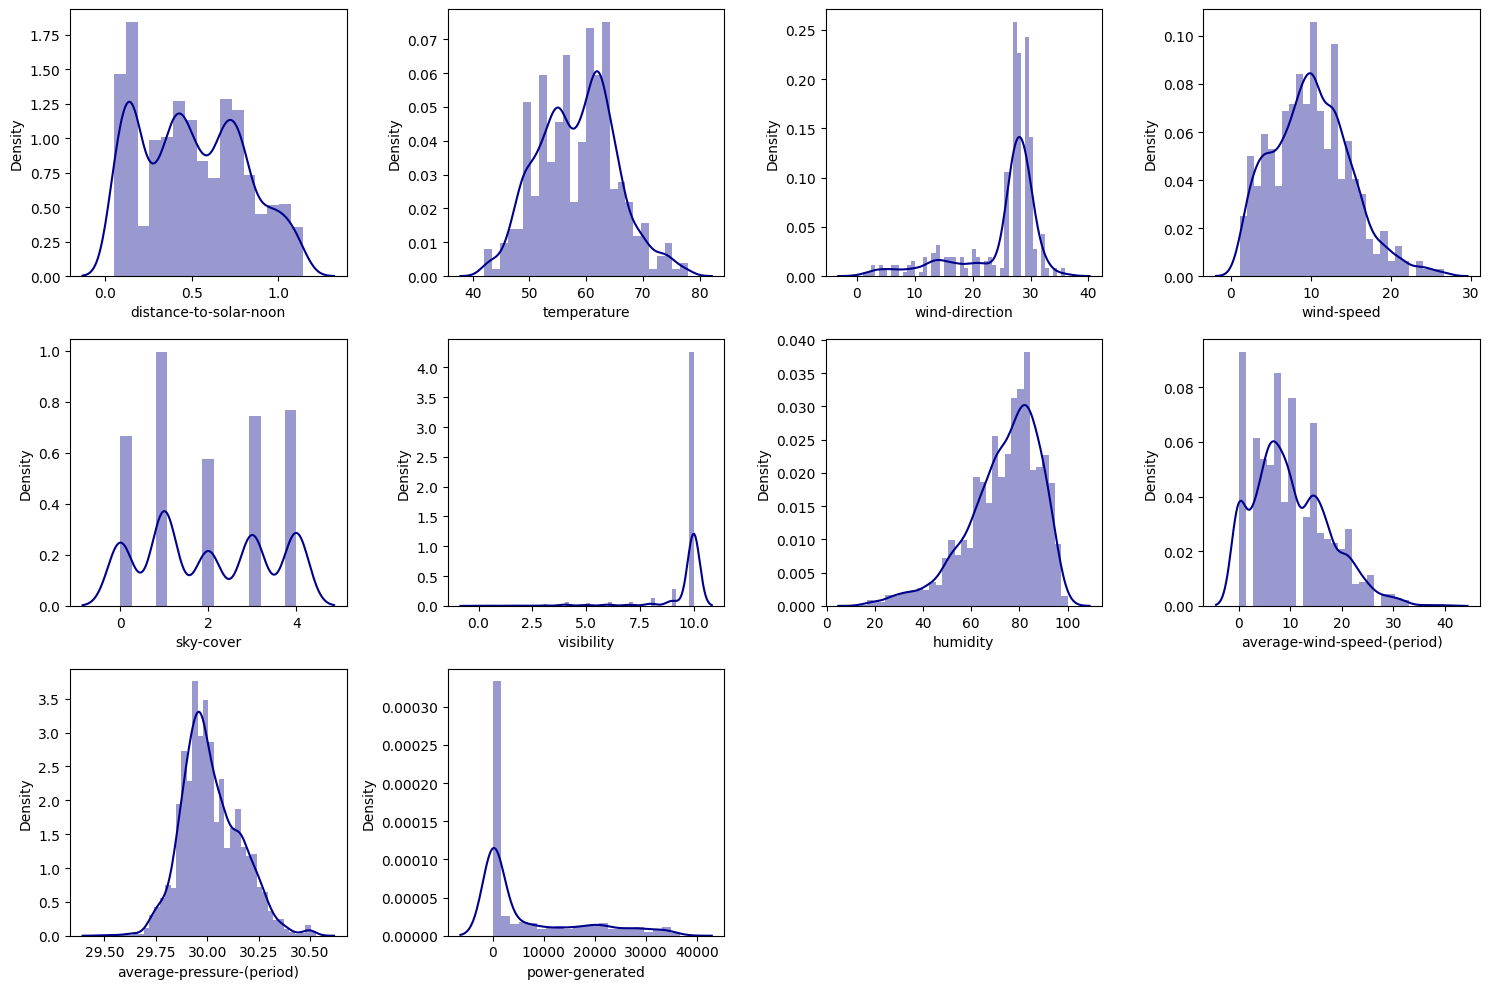

In [14]:
# Let's understand the distribution of our data in each column
plt.figure(figsize=(15,10))
index = 0
for col in df.columns:
    index += 1
    plt.subplot(3, 4, index)
    sns.distplot(df[col], color='darkblue')
    plt.tight_layout()
plt.show()

* Most of the columns are normally distributed but seems to be heavily tailed.
* Column [distance-to-solar-noon] appears to be 3 tailed, suggesting most of the observations are taken on those times.
* Columns like [wind-direction, visibility, humidity] appears to be right skewed and right single tailed, suggesting presence of outliers.
* Columns like [temperature, wind-speed, average-wind-speed-(period), average-pressure-speed-(period), power-generated] appears to be left skewed.
* We can also observe that power-generated column has a lot of instance at 0 meaning there are a lot of instances that do not generate power.
* We can also observe that visibility column has a very dominating presence of the instance 10, so we need to explore that column more.
* the column [average-pressure-(period)] appears ti have a very narrow margin from 29.5 to 30.5, it's more like a constant so we might consider removing it.

In [15]:
# !pip install plotly

In [16]:
# Let's try to understand how wind-direction effect power generation
# Line Plot of Power vs Distance to Solar Noon
import plotly.express as px

# Convert compass index (1–32) to degrees
df['wind-dir-deg'] = (df['wind-direction'] - 1) * 11.25

fig = px.scatter_polar(df,
                       r='power-generated',
                       theta='wind-dir-deg',
                       color='power-generated',
                       title='Polar Plot: Wind Direction vs Power')
fig.show()


* Apprantly wind direction does effect power-generation.
* We can observe most power is generated towards the end of the spectrum roughly translating to 28-32 range from the original range of wind-direction column.

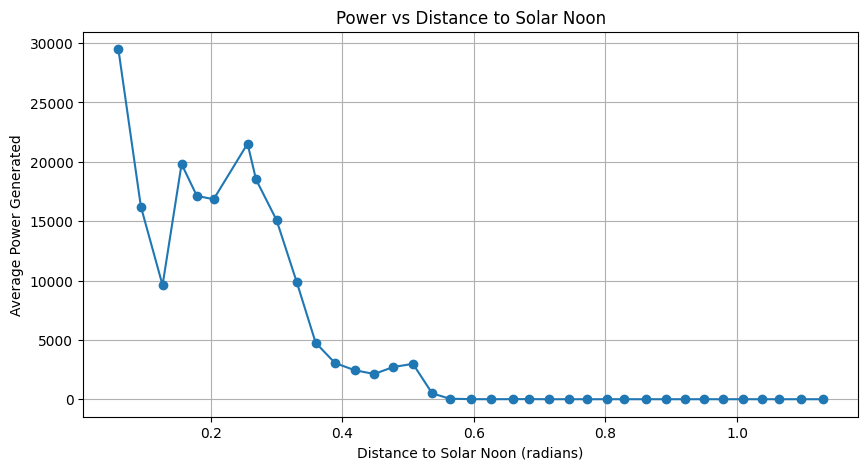

In [17]:
# Bin values to smooth the curve
df['binned_dist'] = pd.cut(df['distance-to-solar-noon'], bins=37)

# Calculate average power per bin
avg_power = df.groupby('binned_dist')['power-generated'].mean()
bin_centers = df.groupby('binned_dist')['distance-to-solar-noon'].mean()

plt.figure(figsize=(10, 5))
plt.plot(bin_centers, avg_power, marker='o')
plt.xlabel("Distance to Solar Noon (radians)")
plt.ylabel("Average Power Generated")
plt.title("Power vs Distance to Solar Noon")
plt.grid(True)
plt.show()


* Average Power generated is higher around 0(represents the highest position of sun) and decreases as we go on.
* Also we can see there is hardly any power generation after 0.6 in average.
* Average power-generation is observed around [0 - 0.4] which roughly times around 9am to 3pm.

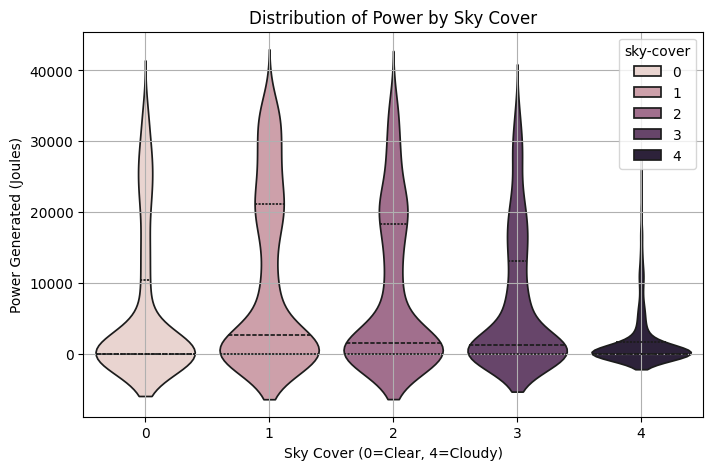

In [18]:
plt.figure(figsize=(8,5))
sns.violinplot(x='sky-cover', y='power-generated', data=df, inner='quartile', hue='sky-cover')
plt.title("Distribution of Power by Sky Cover")
plt.xlabel("Sky Cover (0=Clear, 4=Cloudy)")
plt.ylabel("Power Generated (Joules)")
plt.grid(True)
plt.show()


From this violinplot we can infer that:
* When the sky is clear the power-generation is higher.
* When the sky is coludy there is less power-generation.

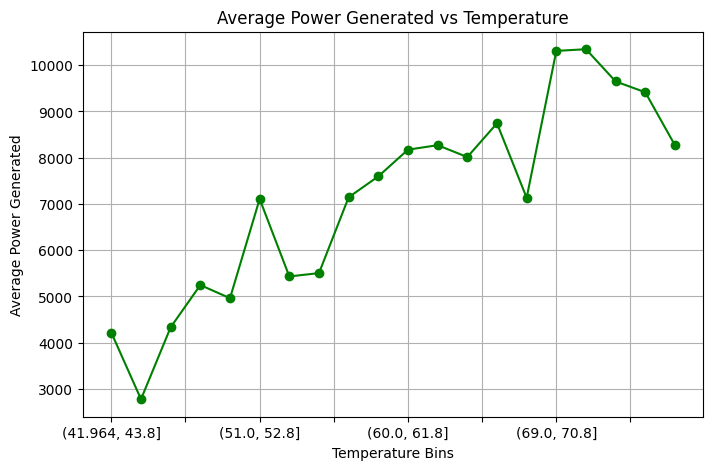

In [19]:
# Let's check how temperature effects the power generation
df['temp_bin'] = pd.cut(df['temperature'], bins=20)
avg_temp = df.groupby('temp_bin')['power-generated'].mean()

avg_temp.plot(kind='line', marker='o', figsize=(8,5), color='green')
plt.title("Average Power Generated vs Temperature")
plt.xlabel("Temperature Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


Based on this line plot we can infer that:
* More the temperature higher is the average power generation.
* Lesses the temperature lower is the average power generation.
* Highest average power generation is observed around 70C.

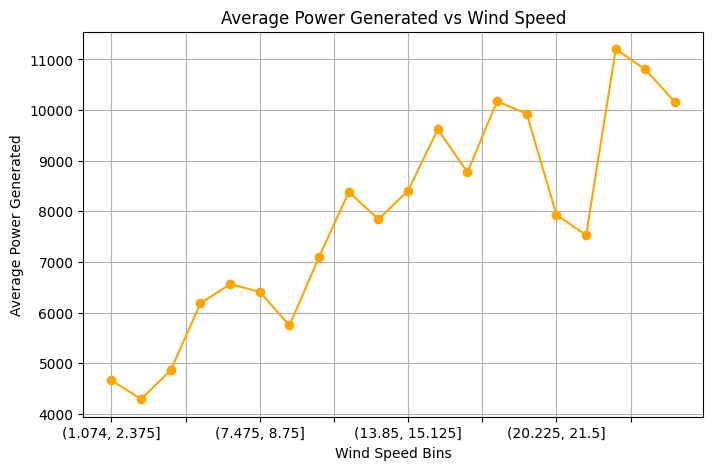

In [20]:
# Let's understand how wind speed effects power generation
df['wind_bin'] = pd.cut(df['wind-speed'], bins=20)
avg_wind = df.groupby('wind_bin')['power-generated'].mean()

avg_wind.plot(kind='line', marker='o', color='orange', figsize=(8,5))
plt.title("Average Power Generated vs Wind Speed")
plt.xlabel("Wind Speed Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


* Here in this plot also we can observe an upward trend suggesting as the wind speed increases there is an increase in the power-generation.
* We can also observe a sudden drop towards wind-speed of around 20, probably due to dust or any other factor.

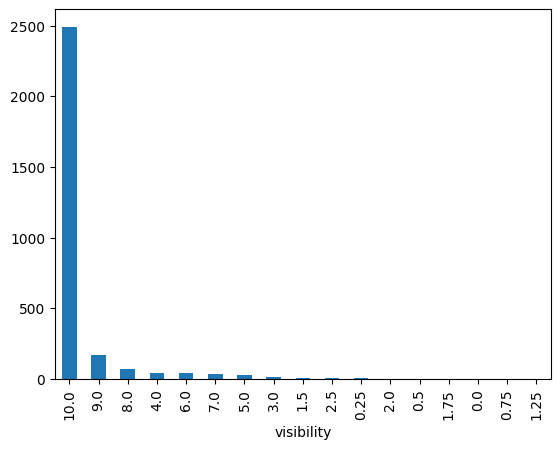

In [21]:
# Let's explore visibility column
df['visibility'].value_counts().plot(kind='bar')
plt.show()

* We can observe here that the visibility column has a lot of instances towards the number 10.
* We need more information about this column so we'll be checking the feature importance.

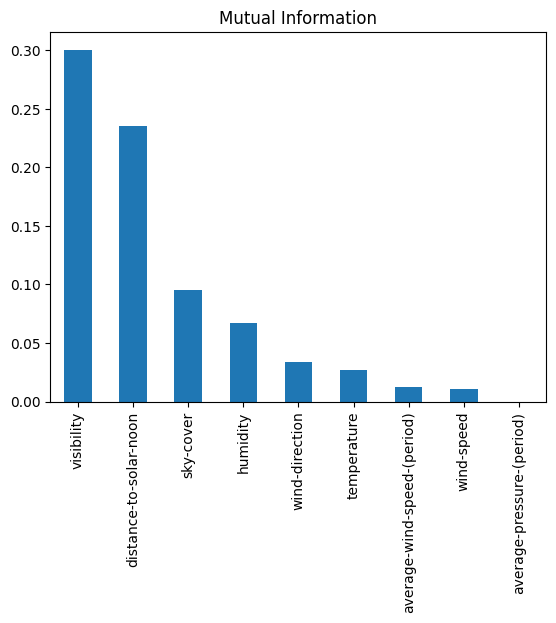

In [22]:
# Let's check feature importnace using mutual_info_classif
# mututal_info_classif = this method finds the non-linear and even subtle changes to the target variable
from sklearn.feature_selection import mutual_info_classif

features = df.drop(columns = ['power-generated', 'wind-dir-deg', 'binned_dist', 'temp_bin', 'wind_bin'], axis=1)
target=df['power-generated']

mi_scores = mutual_info_classif(features, target)
df_mic = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)
df_mic.plot(kind='bar', title='Mutual Information')
plt.show()

* We can see here the visibility feature is actually important, maybe the hidden data lies in the minority.
* So a better way to deal with it is to create bins and then later LabelEncode it treating it as categorical column.
* Another interesting observation we can grasp here is the column [aerage-pressure-(period)] is not that important as we can see in the above graph we also predicted this from density plot, so we will avoid using this for model training.

#Feature Engineering

In [23]:
# Visibility column

def bin_visibility(v):
    if v >= 9.0:
        return 'Very Clear'
    elif v >= 6.0:
        return 'Clear'
    elif v >= 3.0:
        return 'Moderate'
    elif v > 0.0:
        return 'Low Visibility'
    else:
        return 'No Visibility'

df['visibility_bin'] = df['visibility'].apply(bin_visibility)

In [24]:
df['visibility_bin'].value_counts()

,count
visibility_bin,
Very Clear,2660
Clear,151
Moderate,86
Low Visibility,22
No Visibility,1


* This will prevent us from removing the column unnecessarily, and hopefully retain the important data it holds for training.

In [25]:
# df['humidity'].value_counts()

In [26]:
#Humidity column
def humidity_bin(h):
    if h < 40:
        return 'Dry'
    elif h < 70:
        return 'Moderate'
    else:
        return 'Humid'

df['humidity_level'] = df['humidity'].apply(humidity_bin)

In [27]:
# Wind-direction, transforming wind-direction to cylindrical feature
# 0-32
df['wind_dir_sin'] = np.sin(2 * np.pi * df['wind-direction'] / 360)
df['wind_dir_cos'] = np.cos(2 * np.pi * df['wind-direction'] / 360)

This way our model will have a better undrstanding of wind-direction and will not treat them like 0 and 360 degrees are far away from each other.

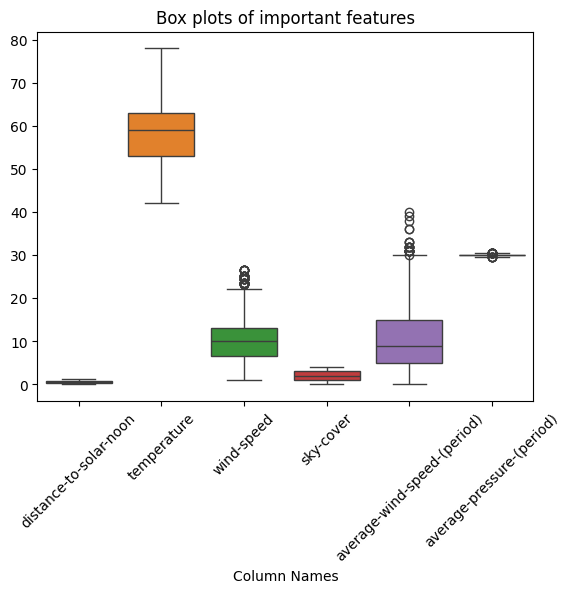

In [28]:
# Box plots to check outliers of important features
# Selecting imporant features to check their outliers
imp_features = ['distance-to-solar-noon', 'temperature', 'wind-speed', 'sky-cover', 'average-wind-speed-(period)', 'average-pressure-(period)']

sns.boxplot(df[imp_features])
plt.title("Box plots of important features")
plt.xticks(rotation=45)
plt.xlabel("Column Names")
plt.show()

In [29]:
# Let's detect number of outliers the above imp_features

# Function to identify outliers using the IQR method
def detect_outliers(column):                                                   #function definition takes columns as input
    Q1 = df[column].quantile(0.25)                                             # defining 25% of the column values
    Q3 = df[column].quantile(0.75)                                             # defiining 75% of the column values
    IQR = Q3 - Q1                                                              # Defining Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR                                               # Finding lower bound
    upper_bound = Q3 + 1.5 * IQR                                               # Finding upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]     # identifying outlier i.e data points below lower_bound and data points above upper_bound
    return outliers                                                            # return those points only

# Check for outliers in each column and summarize
outlier_summary = {}                                      # dictionary to hold the number of outlier in each column
for column in imp_features:                               # running the loop through all the columns in DataFrame
    outliers = detect_outliers(column)                    # Calling the function
    outlier_summary[column] = len(outliers)               # updating dictionary

# Display the outlier counts for each column
print("Total Number of outliers: ",sum(outlier_summary.values()),"\n")
outlier_summary

Total Number of outliers:  97 



{'distance-to-solar-noon': 0,
 'temperature': 0,
 'wind-speed': 40,
 'sky-cover': 0,
 'average-wind-speed-(period)': 26,
 'average-pressure-(period)': 31}

In [30]:
# Removing outliers using IQR Mthod

# def remove_outliers(df, columns):                        #function to remove outliers
#     df_filtered = df.copy()                              # saving a copy
#     for col in columns:                                  #running the loop for all the columns
#         Q1 = df[col].quantile(0.25)                      #defining Q1
#         Q3 = df[col].quantile(0.75)                      # defining Q3
#         IQR = Q3 - Q1                                    #getting IQR
#         lower_bound = Q1 - 1.5 * IQR                     # defining the lower bound
#         upper_bound = Q3 + 1.5 * IQR                     #defining the upper bound
#         df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]  # Keep rows within bounds

#     return df_filtered

# print("Dataset size before removing outliers:", df.shape)
# df = remove_outliers(df, df.columns[:10])                           # Pass all numeric columns at once
# print("Dataset size after removing outliers:", df.shape)

In [31]:
# Treating outliers using Capping method
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

for col in imp_features:
    outlier_capping(df,col)

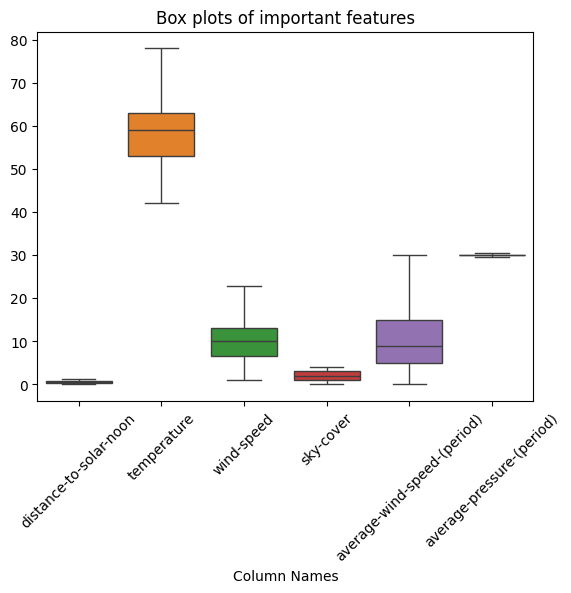

In [32]:
# Ensuring there is no outliers anymore

sns.boxplot(df[imp_features])
plt.title("Box plots of important features")
plt.xticks(rotation=45)
plt.xlabel("Column Names")
plt.show()

In [33]:
#Let's use the LabelEncoder for newly created categorical column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['visibility_bin', 'humidity_level']:
    df[col] = le.fit_transform(df[col])
    print(f"{col} Column has transformed succesfully, it's classes are {le.classes_}")

visibility_bin Column has transformed succesfully, it's classes are ['Clear' 'Low Visibility' 'Moderate' 'No Visibility' 'Very Clear']
humidity_level Column has transformed succesfully, it's classes are ['Dry' 'Humid' 'Moderate']


# Feature Selection

In [39]:
# Feature Selection: Let's select the most important features for model training
x = df.drop(['wind-direction','visibility', 'humidity', 'power-generated', 'wind-dir-deg', 'binned_dist', 'temp_bin', 'wind_bin'], axis=1)
y = df['power-generated']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2336, 10), (584, 10), (2336,), (584,))

In [41]:
# x.columns

In [36]:
# Scaling the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Model building

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [43]:
from sklearn.metrics import r2_score
print(r2_score(rfr.predict(x_train_scaled), y_train))
print(r2_score(rfr.predict(x_test_scaled), y_test))

0.43237893569588115
0.4335468990609709


In [39]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(x_train_scaled, y_train)
# print("Training r2 score: ",r2_score(lr.predict(x_train), y_train))
# print("Testing r2 score: ",r2_score(lr.predict(x_test), y_test))

In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# y should be your original 'power_generated' column
# X should contain your features, all cleaned/preprocessed

# Step 1: Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Apply log1p transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)  # Not necessary for training, but good for comparison

# Step 3: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train_log)

# Step 4: Make predictions and inverse the log
y_pred_log = model.predict(x_test_scaled)
y_pred = np.expm1(y_pred_log)        # Reverse log1p to get predicted Joules

# Step 5: Evaluate performance
print("🔍 Evaluation Metrics (on original target scale):")
print("R² Score:  ", r2_score(y_test, y_pred))
print("MAE:       ", mean_absolute_error(y_test, y_pred))
print("RMSE:      ", mean_squared_error(y_test, y_pred))

# Optional: See a few predictions
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred.round(2)
})

print("\nSample Predictions:\n", comparison_df.head())

🔍 Evaluation Metrics (on original target scale):
R² Score:   0.8727409752585442
MAE:        1778.3499899975611
RMSE:       13405098.024551012

Sample Predictions:
    Actual  Predicted
0   21804   21106.04
1    2065    2045.13
2       0       0.00
3    5654    2248.35
4    3621    1435.33


                       Feature  Importance
0       distance-to-solar-noon    0.916229
2                   wind-speed    0.013374
1                  temperature    0.012524
4  average-wind-speed-(period)    0.012375
5    average-pressure-(period)    0.012271
3                    sky-cover    0.011476
9                 wind_dir_cos    0.007393
8                 wind_dir_sin    0.006712
7               humidity_level    0.004023
6               visibility_bin    0.003622


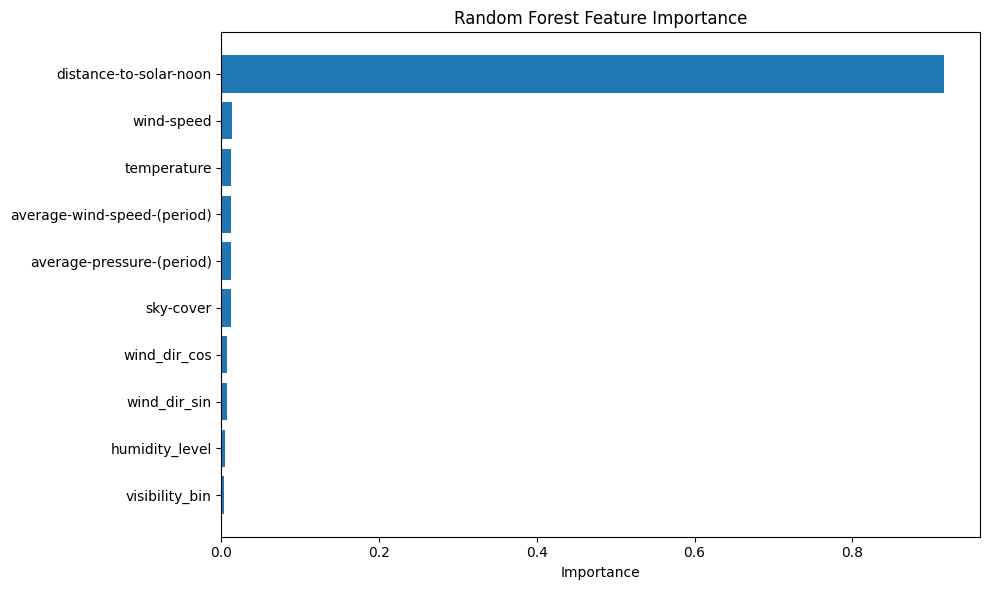

In [45]:
# Get feature importances
importances = model.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feat_imp_df)

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(xgb.predict(x_train), y_train))
print(r2_score(xgb.predict(x_test), y_test))

# Step 5: Evaluate performance
print("🔍 Evaluation Metrics (on original target scale):")
print("R² Score:  ", r2_score(y_test, xgb.predict(x_test)))
print("MAE:       ", mean_absolute_error(y_test, xgb.predict(x_test)))
print("RMSE:      ", mean_squared_error(y_test, xgb.predict(x_test)))